In [1]:
import numpy as np
import ROOT

Welcome to JupyROOT 6.22/08


In [20]:
pressure = [7.5, 30.0, 139.5]
pres_error = [0.0, 0.0, 0.0]
polarization = [2.24, 0.438, 0.0256]
pol_error = [0.03, 0.0007, 0.0005]
pressure = np.array(pressure)
pres_error = np.array(pres_error)
polarization = np.array(polarization)
pol_error = np.array(pol_error)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
input_line_140:2:92: error: expected ';' after return statement
Double_t TFormula____id15699804303369961837(Double_t *x,Double_t *p){ return p[0]/x[0]+p[1]) ; }
                                                                                           ^
                                                                                           ;
input_line_141:2:92: error: expected ';' after return statement
Double_t TFormula____id15699804303369961837(Double_t *x,Double_t *p){ return p[0]/x[0]+p[1]) ; }
                                                                                           ^
                                                                                           ;
Error in <prepareMethod>: Can't compile function TFormula____id15699804303369961837 prototype with arguments Double_t*,Double_t*
Error in <TFormula::InputFormulaIntoCling>: Error compiling formula expression in Cling
Error in <TFormula:

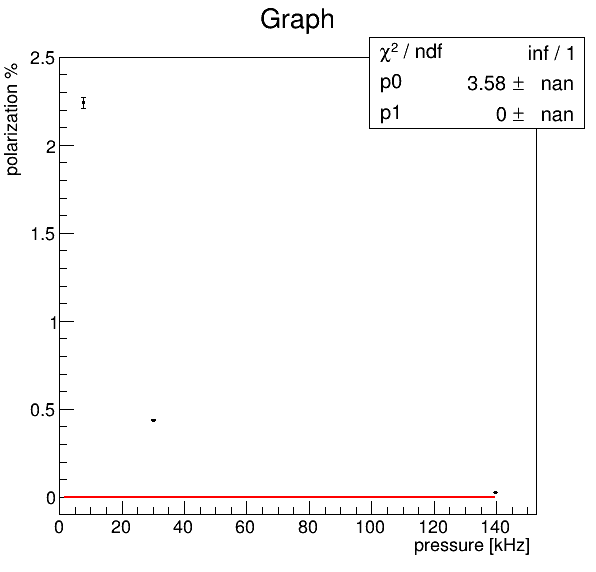

In [28]:
c1 = ROOT.TCanvas("c1", "c1", 600, 600)
gr = ROOT.TGraphErrors(len(pressure), pressure, polarization, pres_error, pol_error)
gr_fit = ROOT.TF1("f", "[0]/x + [1])", 1.0, 140.)
gr_fit.SetParameters(3.58, 0.0)
#gr_fit.FixParameter(1, 0.0)
#gr_fit = ROOT.TF1("f", "[0]/x + [1]*expo(-[2]*x)", 1.0, 140.)
#gr_fit.SetParameter(3.58, 1.0, 1.0)
#gr_fit.SetParRange("[1]>0.0")
gr.Fit(gr_fit, "QR")
par = [gr_fit.GetParameter(k) for k in range(gr_fit.GetNpar())]
ROOT.gStyle.SetOptFit(1)
gr.Draw("AP")
gr.SetMarkerStyle(7)
gr.SetMarkerSize(10)
gr.GetXaxis().SetTitle("pressure [kHz]")
gr.GetYaxis().SetTitle("polarization %")
gr.GetYaxis().SetRangeUser(-0.1, 2.5)
c1.Draw("same")

In [11]:
par

[17.681632073562128, -0.12336290987788401]

In [12]:
par[0]/300+par[1]

-0.06442413629934358